In [1]:
import pandas as pd
import numpy as np

# 단위 백만원

df = pd.read_excel('data/for_ML/사회복지지출 금액 분류.xlsx')
df.head(3)

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,근로무능력관련급여,2209718,2652648,3179135,3825199,4759639,5231984,5840541,6350569,7049178,...,7642789,8311593,8479156,8665211,9544251,10083220.4,11354142.1,12510132.6,13977295.3,16190253.6
1,적극적노동시장프로그램,2313351,1428835,1342499,931917,938848,1022514,1074230,1255823,2606232,...,3308486,4495698,5248351,5365912,5538555,6051662.4,5454739.0,6856095.0,7086752.0,7290995.9
2,실업,470792,845109,834948,1030304,1448306,1751974,2074004,2434033,2865256,...,3561353,3676665,3883507,4156137,4547336,4895396.0,5264784.1,6737845.3,8545514.6,15140795.9


In [2]:
# 행 열 바꾸기
df = df.transpose()
df.head(3)

,0,1,2
Unnamed: 0,근로무능력관련급여,적극적노동시장프로그램,실업
2000,2209718,2313351,470792
2001,2652648,1428835,845109


In [3]:
df.columns = df.iloc[0]
df = df[1:]

df

Unnamed: 0,근로무능력관련급여,적극적노동시장프로그램,실업
2000,2209718,2313351,470792
2001,2652648,1428835,845109
2002,3179135,1342499,834948
2003,3825199,931917,1030304
2004,4759639,938848,1448306
2005,5231984,1022514,1751974
2006,5840541,1074230,2074004
2007,6350569,1255823,2434033
2008,7049178,2606232,2865256
2009,7508763,4961445,4116404


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2000 to 2020
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   근로무능력관련급여    21 non-null     object
 1   적극적노동시장프로그램  21 non-null     object
 2   실업           21 non-null     object
dtypes: object(3)
memory usage: 672.0+ bytes


In [5]:
df['근로무능력관련급여'] = df['근로무능력관련급여'].astype(float)
df['적극적노동시장프로그램'] = df['적극적노동시장프로그램'].astype(float)
df['실업'] = df['실업'].astype(float)

In [6]:
df.index = df.index.map(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2000 to 2020
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   근로무능력관련급여    21 non-null     float64
 1   적극적노동시장프로그램  21 non-null     float64
 2   실업           21 non-null     float64
dtypes: float64(3)
memory usage: 672.0+ bytes


In [8]:
df.head(3)

Unnamed: 0,근로무능력관련급여,적극적노동시장프로그램,실업
2000,2209718.0,2313351.0,470792.0
2001,2652648.0,1428835.0,845109.0
2002,3179135.0,1342499.0,834948.0


In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/NanumGothic.ttf").get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':  # macOS
    rc('font', family='NanumGothic')
else:
    print("Unsupported OS")

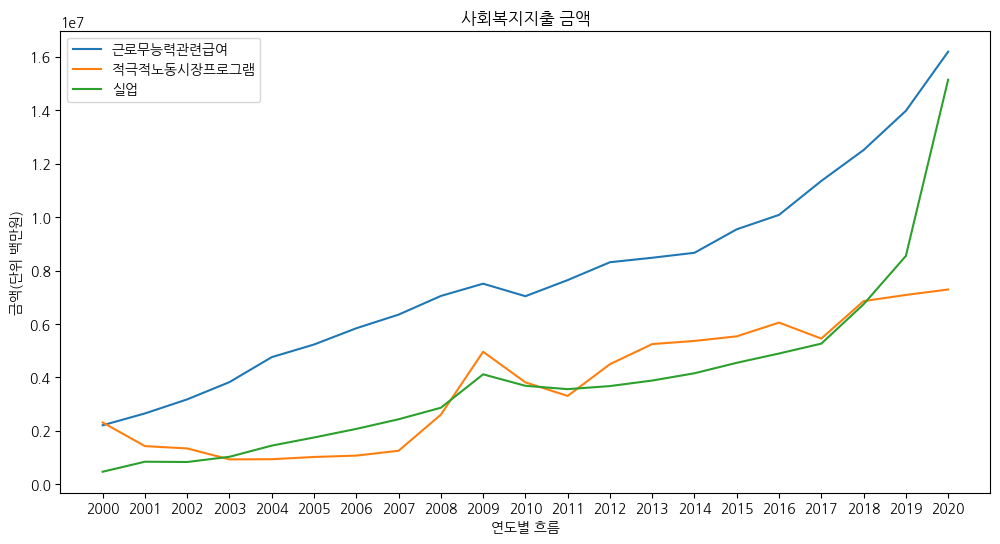

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(df.index, df['근로무능력관련급여'], label = '근로무능력관련급여')
plt.plot(df.index, df['적극적노동시장프로그램'], label = '적극적노동시장프로그램')
plt.plot(df.index, df['실업'], label = '실업')

plt.title('사회복지지출 금액')
plt.xlabel('연도별 흐름')
plt.ylabel('금액(단위 백만원)')
plt.xticks(df.index)

plt.legend()
plt.show()

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,,,,,,,,
근로무능력관련급여,21.0,7.733595e+06,3.680588e+06,2209718.0,5231984.0,7508763.0,9544251.0,16190253.6
적극적노동시장프로그램,21.0,3.732766e+06,2.269537e+06,931917.0,1342499.0,3815149.0,5454739.0,7290995.9
실업,21.0,3.903190e+06,3.282416e+06,470792.0,1751974.0,3676665.0,4547336.0,15140795.9
